# TASK 1 - Prediction using Supervised Machine Learning
In this task it is required to predict the percentage of a student on the basis of number of hours studied using the Linear Regression supervised machine learning algorithm.

Steps:
Step 1 - Importing the dataset
Step 2 - Visualizing the dataset
Step 3 - Data preparation
Step 4 - Training the algorithm
Step 5 - Visualizing the model
Step 6 - Making predcitions
Step 7 - Evaluating the model
Author: Aniket Tanpure


In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import the data in the pandas dataframe
data = pd.read_csv('student_marks.csv')

In [3]:
# check first 5 rows of data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# check last 5 rows of data
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
# find the number of rows and columns
data.shape

(25, 2)

In [7]:
# find more info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [10]:
# checking the null values in the data
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# STEP 2 - Visualizing the dataset
In this we will plot the dataset to check whether we can observe any relation between the two variables or not

<Figure size 1152x648 with 0 Axes>

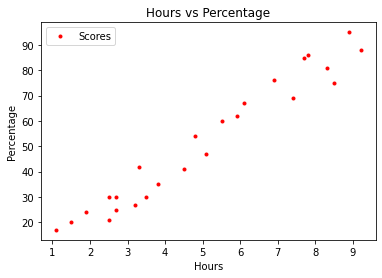

In [15]:
plt.figure(figsize=(16,9))
data.plot(x='Hours',y='Scores',style='.',color='red')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

# From the graph above, we can observe that there is a linear relationship between "hours studied" and "percentage score". So, we can use the linear regression supervised machine model on it to predict further values.

In [16]:
# we can also use the correlation between the variables
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# STEP 3 - Data preparation in this step we will divide the data into "features" (inputs) and "labels" (outputs). 
After that we will split the whole dataset into 2 parts - testing data and training data.


In [17]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [18]:
# using the iloc funcion we can divide the data
x = data.iloc[:,:1].values
y = data.iloc[:,1:].values

In [19]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [20]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [21]:
# split the data into training & testing data
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# STEP 4 - Training the Algorithm
We have splited our data into training and testing sets, and now we will train our Model.

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
model.fit(x_train,y_train)

LinearRegression()

# STEP 5 - Visualizing the model
After training the model, now its time to visualize it.

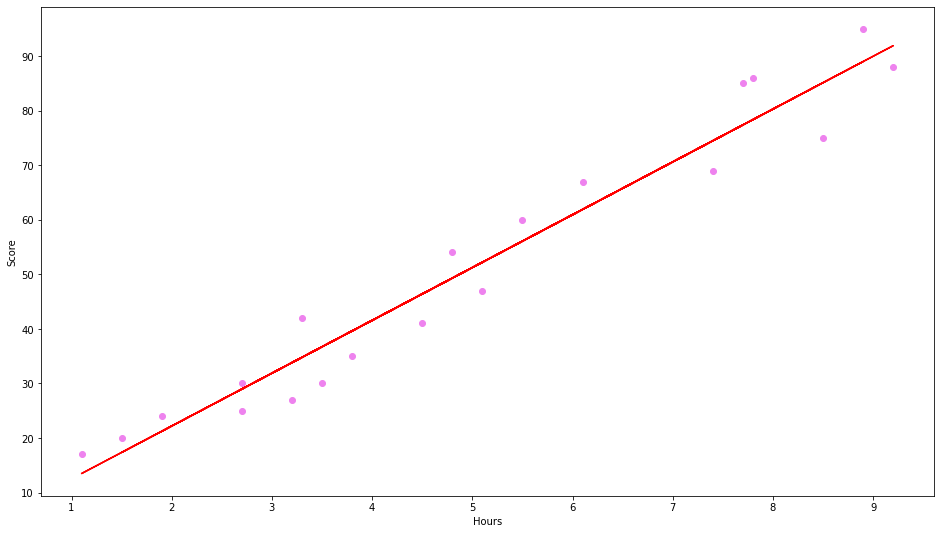

In [27]:
line = model.coef_*x + model.intercept_

# plotting for the training data
plt.figure(figsize=(16,9))
plt.scatter(x_train,y_train,color='violet')
plt.plot(x,line,color='red')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

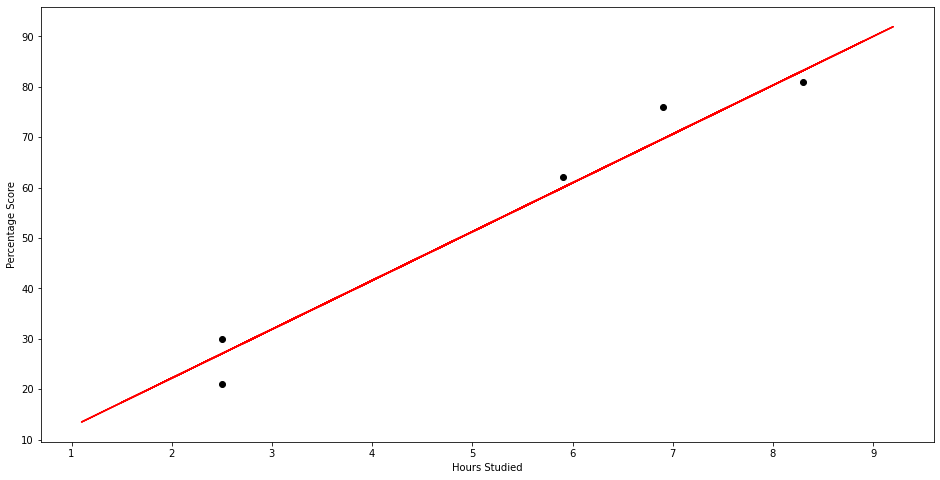

In [29]:
# plot for the testing data
plt.figure(figsize=(16,8))
plt.scatter(x_test,y_test,color='black')
plt.plot(x,line,color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# STEP 6 - Making Predictions Now that we have trained our algorithm, it's time to make some predictions.

In [30]:
print(x_test) # Testing data in hours
y_pred = model.predict(x_test) # predict the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [31]:
y_test

array([[81],
       [30],
       [21],
       [76],
       [62]], dtype=int64)

In [32]:
y_pred

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [33]:
# comparing the predicted vs the actual output
comp = pd.DataFrame({'Actual':[y_test],'predicted':[y_pred]})
comp

,Actual,predicted
0,"[[81], [30], [21], [76], [62]]","[[83.18814103588203], [27.03208774003898], [27..."


In [36]:
# testing with the own data
hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [92.38611528]


# STEP 7 - Evaluating the model
In the last step, we are going to evaluate our trained model by calculating mean absolute error

In [39]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 3.9207511902099244
